# Obtención y preparación de datos

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

boston = load_boston()

df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = boston.target[df.index]
df.head()

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the 

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [2]:
x = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.33, random_state = 100)

# Nuestro primer árbol de regresión: Árbol de profundidad 2

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
reg = DecisionTreeRegressor(max_depth = 2)

#### Nota: Es importante que recordemos que nuestros datos están escalados si usamos el rango de 0.0 hasta 40.0 no se van a ver, ahora nuestros datos están entre 0.0 y 1.0

In [5]:
reg.fit(x_train, y_train)
y_train_predict = reg.predict(x_train)
y_test_predict = reg.predict(x_test)

In [6]:
x_plot = np.linspace(0,1,1000).reshape(-1, 1)
y_plot = reg.predict(x_plot)

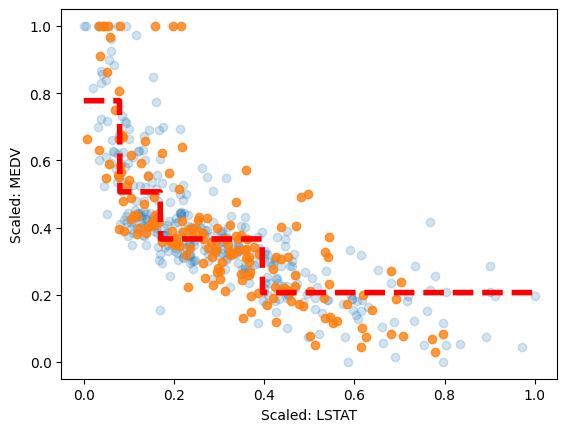

In [7]:
plt.scatter(x_train, y_train, alpha = 0.2)
plt.scatter(x_test, y_test, alpha = 0.8)
plt.plot(x_plot, y_plot, "r--", lw = 4)

plt.xlabel("Scaled: LSTAT")
plt.ylabel("Scaled: MEDV")
plt.show()

In [ ]:
print("Entrenamiento", r2_score(y_train, y_train_predict))
print("Prueba", r2_score(y_test, y_test_predict))

# Usando Graphviz para mostrar el árbol obtenido

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(reg, out_file = "scaled_tree2.ps")

### Código devuelto
digraph Tree {
<br>node [shape=box] ;
<br>0 [label="X[0] <= 0.169\nmse = 0.039\nsamples = 339\nvalue = 0.391"] ;
<br>1 [label="X[0] <= 0.08\nmse = 0.037\nsamples = 110\nvalue = 0.583"] ;
<br>0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
<br>2 [label="mse = 0.03\nsamples = 31\nvalue = 0.777"] ;
<br>1 -> 2 ;
<br>3 [label="mse = 0.019\nsamples = 79\nvalue = 0.506"] ;
<br>1 -> 3 ;
<br>4 [label="X[0] <= 0.396\nmse = 0.014\nsamples = 229\nvalue = 0.298"] ;
<br>0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
<br>5 [label="mse = 0.007\nsamples = 132\nvalue = 0.366"] ;
<br>4 -> 5 ;
<br>6 [label="mse = 0.008\nsamples = 97\nvalue = 0.206"] ;
<br>4 -> 6 ;
<br>}

### ¿Cómo transformar el código en una imagén?
Alternativa 1: https://edotor.net/
<br>Alternativa 2: http://www.webgraphviz.com/
<br>Alternativa 3: https://stamm-wilbrandt.de/GraphvizFiddle/#

<center><img src="img/Tree_2.png" width = "80%"></center>

# Árbol de profundidad 3

In [ ]:
x = df["LSTAT"].values.reshape(-1, 1)
y = df["MEDV"].values.reshape(-1, 1)

x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
x = x_scaler.fit_transform(x)
y = y_scaler.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size = 0.33, random_state = 100)

In [ ]:
reg = DecisionTreeRegressor(max_depth = 3)

In [ ]:
reg.fit(x_train, y_train)
y_train_predict = reg.predict(x_train)
y_test_predict = reg.predict(x_test)

In [ ]:
x_plot = np.linspace(0,1,1000).reshape(-1, 1)
y_plot = reg.predict(x_plot)

In [ ]:
plt.scatter(x_train, y_train, alpha = 0.2)
plt.scatter(x_test, y_test, alpha = 0.8)
plt.plot(x_plot, y_plot, "r--", lw = 4)

plt.xlabel("Scaled: LSTAT")
plt.ylabel("Scaled: MEDV")
plt.show()

In [ ]:
print("Entrenamiento", r2_score(y_train, y_train_predict))
print("Prueba", r2_score(y_test, y_test_predict))

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(reg, out_file = "scaled_tree3.ps")

# Ahora tenemos dos nuevos problemas: 
## 1) Hay mucho código que se reutiliza  
## 2) Los datos están escalados 

In [ ]:
def arbolRegresionEscalado(max_depth = 2):

    x = df["LSTAT"].values.reshape(-1, 1)
    y = df["MEDV"].values.reshape(-1, 1)
    
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    x = x_scaler.fit_transform(x)
    y = y_scaler.fit_transform(y)

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = 0.33, random_state = 100)
    
    reg = DecisionTreeRegressor(max_depth = max_depth)
    
    reg.fit(x_train, y_train)
    y_train_predict = reg.predict(x_train)
    y_test_predict = reg.predict(x_test)
    
    x_plot = np.linspace(0,1,1000).reshape(-1, 1)
    y_plot = reg.predict(x_plot)
    
    plt.scatter(x_train, y_train, alpha = 0.2)
    plt.scatter(x_test, y_test, alpha = 0.8)
    plt.plot(x_plot, y_plot, "r--", lw = 4)

    plt.xlabel("Scaled: LSTAT")
    plt.ylabel("Scaled: MEDV")
    plt.show()
    
    print("Entrenamiento", r2_score(y_train, y_train_predict))
    print("Prueba", r2_score(y_test, y_test_predict))
    print()
    
    file_name = "scaled_tree" + str(max_depth) + ".ps"
    file_name = str(file_name)
    from sklearn.tree import export_graphviz
    export_graphviz(reg, out_file = file_name)

In [ ]:
arbolRegresionEscalado(4)
arbolRegresionEscalado(5)
arbolRegresionEscalado(6)
arbolRegresionEscalado(7)

### Para volver a los valores originales utilizaremos:
x_scaler.inverse_transform
<br>y_scaler.inverse_transform

In [ ]:
def arbolRegresion(max_depth = 2):

    x = df["LSTAT"].values.reshape(-1, 1)
    y = df["MEDV"].values.reshape(-1, 1)
    
    x_scaler = MinMaxScaler()
    y_scaler = MinMaxScaler()
    x = x_scaler.fit_transform(x)
    y = y_scaler.fit_transform(y)

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size = 0.33, random_state = 100)
    
    reg = DecisionTreeRegressor(max_depth = max_depth)
    
    reg.fit(x_train, y_train)
    y_train_predict = reg.predict(x_train)
    y_test_predict = reg.predict(x_test)
    
    x_plot = np.linspace(0,1,1000).reshape(-1, 1)
    y_plot = reg.predict(x_plot)
       
    plt.scatter(x_scaler.inverse_transform(x_train), y_scaler.inverse_transform(y_train), alpha = 0.2)
    plt.scatter(x_scaler.inverse_transform(x_test), y_scaler.inverse_transform(y_test), alpha = 0.8)
    plt.plot(x_scaler.inverse_transform(x_plot), y_scaler.inverse_transform(y_plot.reshape(-1,1)), "r--", lw = 4)

    plt.xlabel("LSTAT")
    plt.ylabel("MEDV")
    plt.show()
    
    print("Entrenamiento", r2_score(y_train, y_train_predict))
    print("Prueba", r2_score(y_test, y_test_predict))
    print()
    
    file_name = "tree" + str(max_depth) + ".ps"
    file_name = str(file_name)
    from sklearn.tree import export_graphviz
    export_graphviz(reg, out_file = file_name)

In [ ]:
arbolRegresion(4)
arbolRegresion(5)
arbolRegresion(6)
arbolRegresion(7)